In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


df=pd.read_csv("../data/fish.csv")
twoFishDF=df[df["Species"].isin(["Bream","Smelt"])].reset_index(drop=True)[["Species","Weight","Length"]]
featureDF=twoFishDF[twoFishDF.columns[1:]]
targetDF=twoFishDF[twoFishDF.columns[0]].map({"Bream":0,"Smelt":1}).astype("int")

In [3]:
# 학습 : 테스트 = 80 : 20
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify=targetDF)

In [4]:
# feature data scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)

StandardScaler()

In [5]:
# 학습용 데이터 피쳐 스케일링
scalar.fit(x_train)
scalar.mean_ # x_train의 평균을 출력 
scaled_x_train=scalar.transform(x_train)

In [6]:
# 학습용 데이터 피쳐 스케일링
scalar.fit(x_test)
scalar.mean_ # x_test의 평균을 출력 
scaled_x_test=scalar.transform(x_test)

In [7]:
# 원본 데이터 시각화
#plt.scatter(x_train["Weight"], x_train["Length"])

In [8]:
# 스케일된 데이터 시각화 
#data=pd.DataFrame(scaled_x_train, columns=["Weight","Length"])
#plt.scatter(data["Weight"], data["Length"])

In [9]:
model=KNeighborsClassifier()
model.fit(scaled_x_train, y_train)

KNeighborsClassifier()

In [10]:
model.score(scaled_x_test, y_test)

1.0

In [11]:
# 예측
new_data=pd.DataFrame([[160,25]],columns=["Weight","Length"])
scaled_new_data = scalar.transform(new_data)
predicted=model.predict(scaled_new_data)
predicted

array([0])

In [14]:
# 모델을 파라미터를 변경해가면서 계속 늘려간다 

max_k=scaled_x_train.shape[0]

test_scoreList=[]
train_scoreList=[]
for k in range(1,max_k+1):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    test_scoreList.append(model.score(scaled_x_test, y_test))
    train_scoreList.append(model.score(scaled_x_train,y_train))

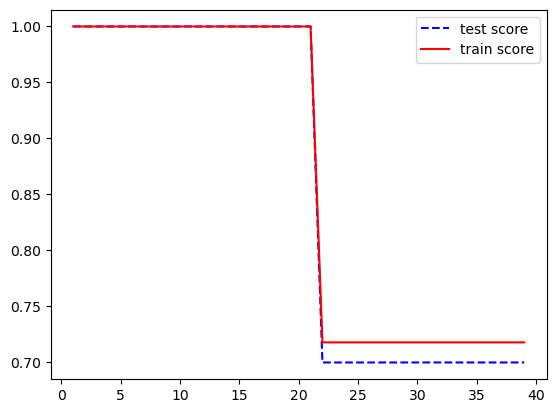

In [22]:
test_scoreList, train_scoreList
x=range(1,max_k+1)
plt.plot(x,test_scoreList,"b--" ,label="test score")
plt.plot(x,train_scoreList,"r-" ,label="train score")
plt.legend()
plt.show()